# Plots for the analysis

In [11]:
# Import packages
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

In [12]:


df = pd.read_csv("/Users/moritzschneider/Documents/Uni/Copenhagen/Social Data Science/Git Group/Group-31-SoDa/Data/movie_1.csv", index_col=0)

#Make a copy of the data set


df2= df.copy()

df2

,Title,Year,Rating,Gross,Director,Summary,Top Star,Genre 1,Genre 2,Genre 3,Female,d_Female,d_Drop
0,En verden udenfor,1994,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Drama,NaN,NaN,0.0,0.0,0.0
1,The Dark Knight,2008,9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,Christian Bale,Action,Crime,Drama,0.0,0.0,0.0
2,Inception,2010,8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,Leonardo DiCaprio,Action,Adventure,Sci-Fi,0.0,0.0,0.0
3,Fight Club,1999,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,Brad Pitt,Drama,NaN,NaN,0.0,0.0,0.0
4,Pulp Fiction,1994,8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",John Travolta,Crime,Drama,NaN,0.0,0.0,0.0
5,Forrest Gump,1994,8.8,330.25,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...",Tom Hanks,Drama,Romance,NaN,0.0,0.0,0.0
6,The Matrix,1999,8.7,171.48,"['Lana Wachowski, ', 'Lilly Wachowski']",A computer hacker learns from mysterious rebel...,Keanu Reeves,Action,Sci-Fi,NaN,0.0,1.0,0.0
7,Ringenes herre: Eventyret om ringen,2001,8.8,315.54,Peter Jackson,A meek Hobbit from the Shire and eight compani...,Elijah Wood,Adventure,Drama,Fantasy,0.0,0.0,0.0
8,Ringenes herre: Kongen vender tilbage,2003,8.9,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,Elijah Wood,Adventure,Drama,Fantasy,0.0,0.0,0.0
9,The Dark Knight Rises,2012,8.4,448.14,Christopher Nolan,Eight years after the Joker's reign of anarchy...,Christian Bale,Action,Thriller,NaN,0.0,0.0,0.0


In [13]:
#Cleaning genre

df2['Genre 1'] = df["Genre 1"].str.strip()
df2["Genre 2"] = df["Genre 2"].str.strip()
df2["Genre 3"] = df["Genre 3"].str.strip()

###  Plot of top ten directors 

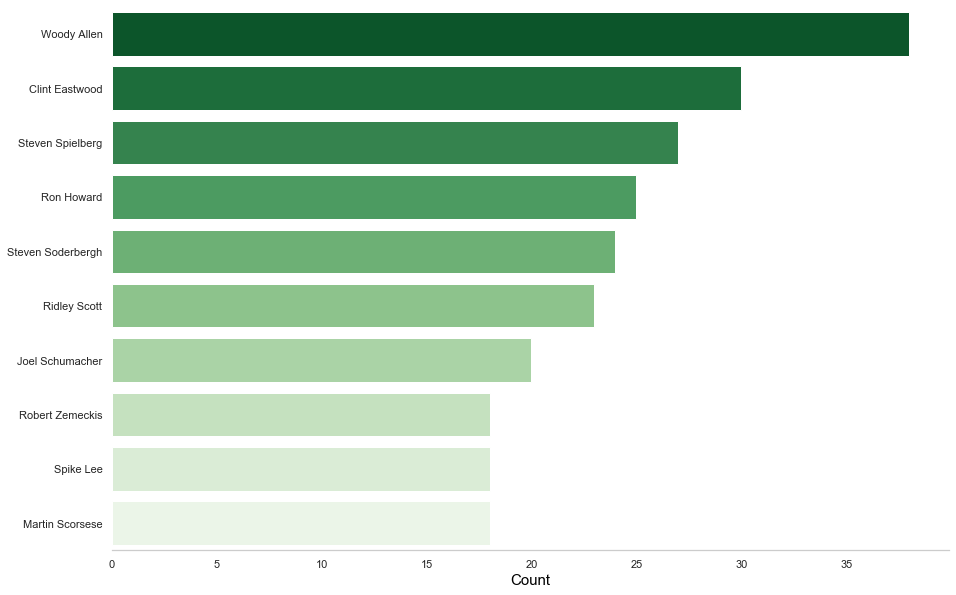

In [14]:
# top 10 directors overall
#Defining data for directors
dfd = df.drop(df[df.d_Drop == 1].index)

#Plotting starts from here
top10_directors = dfd["Director"].value_counts()[:10]
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
ax = sns.barplot(top10_directors.values, top10_directors.index, palette=("Greens_r"))
plt.xlabel("Count", fontsize=15, color="Black")
plt.grid(False)
sns.despine(left=True, right=True, bottom=False)
matplotlib.rcParams.update({'font.size': 30})
plt.savefig('Top10Directors')
plt.show()

### Plot of top ten actors

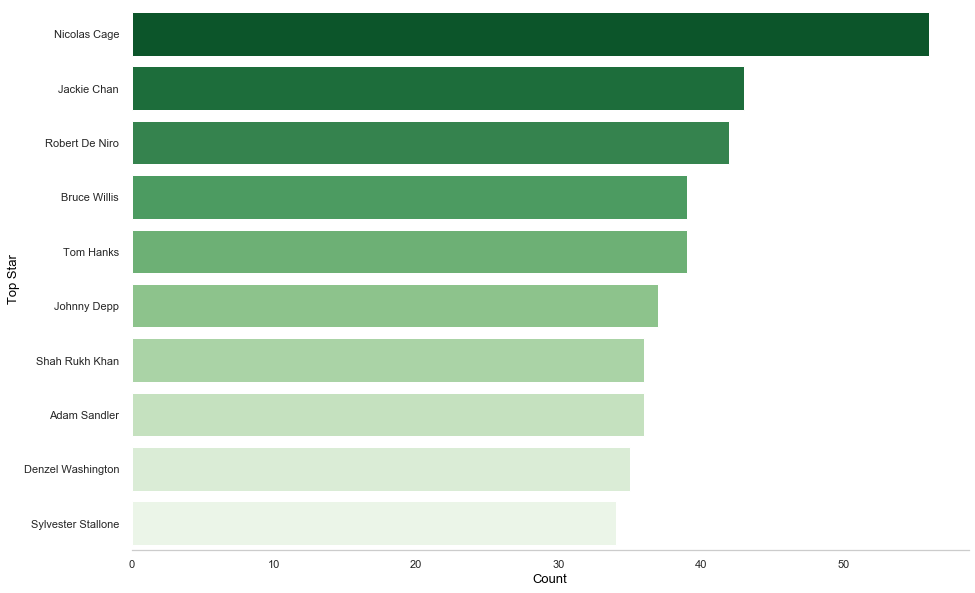

In [15]:
top10_actors = df["Top Star"].value_counts()[:10]
plt.figure(figsize=(15,10))
sns.barplot(top10_actors.values, top10_actors.index, palette=("Greens_r"))
plt.xlabel("Count", fontsize=13, color="Black")
plt.ylabel("Top Star", fontsize=13, color="Black")
plt.grid(False)
sns.despine(left=True, right=True, bottom=False)
plt.savefig('Top10Actors.png')
plt.show()

### Female leads

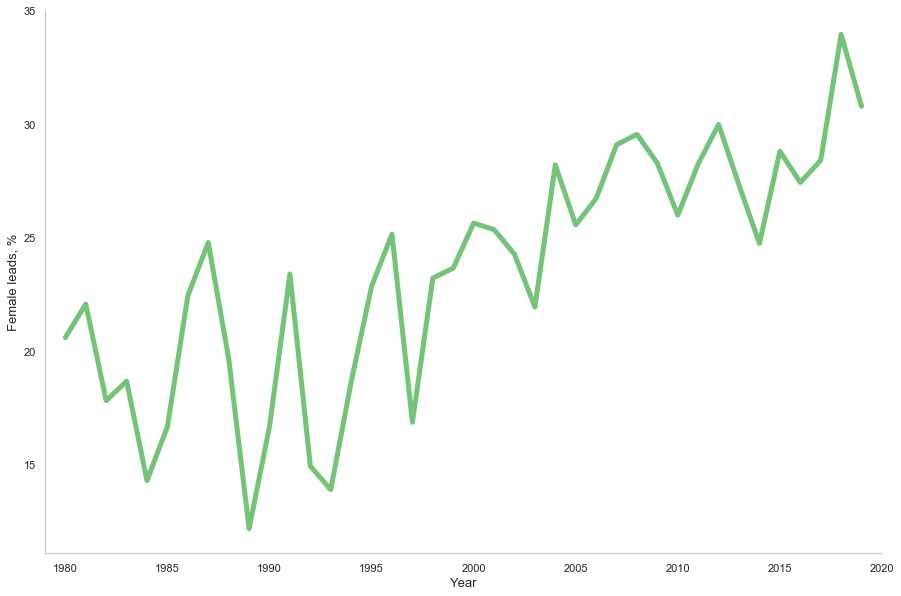

In [16]:
df1 = df.groupby(['Year'])

df2 = df1['Female'].mean().reset_index()
df2['Female'] = df2['Female']*100

plt.figure(figsize=(15,10))
df3 = df2.set_index('Year')
ax = sns.lineplot(data=df3, legend = None, palette = 'Greens', linewidth=5)
ax.set_xlim([1979,2020])
ax.grid(False)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Female leads, %', fontsize=13)
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13) 
sns.despine(left=False, right=True, bottom=False)
plt.savefig("percent actresses")

### Genre 

In [17]:
# Getting and transforming the data

test_df = df2[['Female', 'Genre 1', 'Genre 2', 'Genre 3']]

genre_1 = test_df[['Female', 'Genre 1']]
genre_2 = test_df[['Female', 'Genre 2']]
genre_3 = test_df[['Female', 'Genre 3']]

genre_1x = genre_1.rename(columns = {'Genre 1': 'Genre'})
genre_2x = genre_2.rename(columns = {'Genre 2': 'Genre'})
genre_3x = genre_3.rename(columns = {'Genre 3': 'Genre'})


all_genres = pd.concat([genre_1x, genre_2x, genre_3x])


#Ad total amount of males vs females in the graph below in a pie chart

KeyError: "['Genre 3', 'Genre 2', 'Genre 1'] not in index"

NameError: name 'all_genres' is not defined

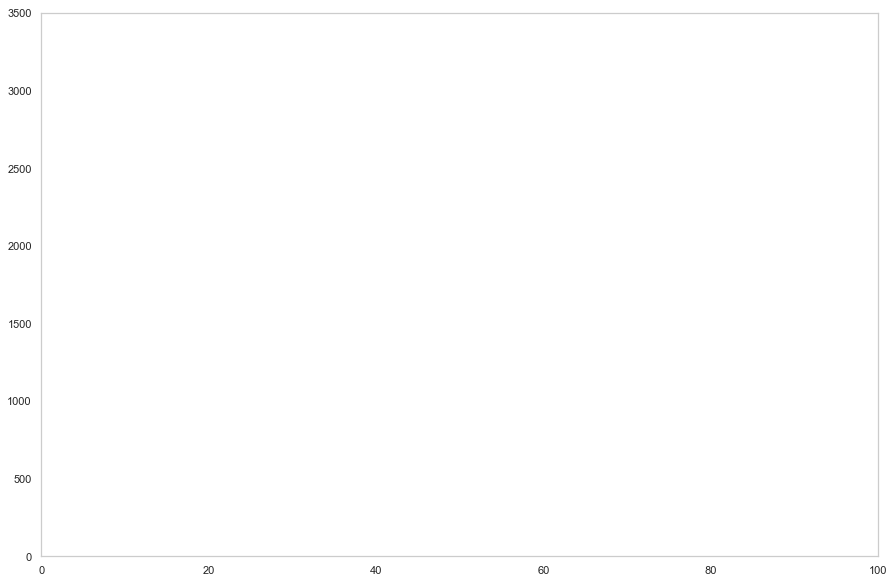

In [11]:
#Define data used for pie chart
ratios = df["Female"].value_counts("0")
labels = 'Male', 'Female'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Female')

#Outer plot
fig, ax = plt.subplots(figsize = (15, 10))
ax.set_xlim([0,100]) #Sets the number of the axis
ax.set_ylim([0,3500])
ax.grid(False)


axes = sns.countplot(x="Genre", data=all_genres, hue="Female", order = all_genres['Genre'].value_counts()[:10].index, hue_order = all_genres['Female'].value_counts().index, palette='Greens_r')
plt.xlabel('Genre', fontsize=15, color='Black')
plt.ylabel('Count', fontsize=15, color='Black')
sns.despine(left=False, right=True, bottom=False)
ax.get_legend().set_visible(False)



# Inner plot
ax1= plt.axes([0.55, 0.45, 0.5, 0.5])
wedges, texts, autotexts = plt.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=180, colors = ["seagreen",'darkseagreen'], textprops=dict(color="white"), wedgeprops   = { 'linewidth' : 1,'edgecolor' : "white" })
plt.setp(autotexts, size=15, weight='bold')
plt.legend(wedges, labels, loc='best', frameon=False)
plt.tight_layout()

ax1.legend(bbox_to_anchor=(0.7, 0.9), frameon=False)
#plt.savefig('Genrething.png')

### Directors, plot 1

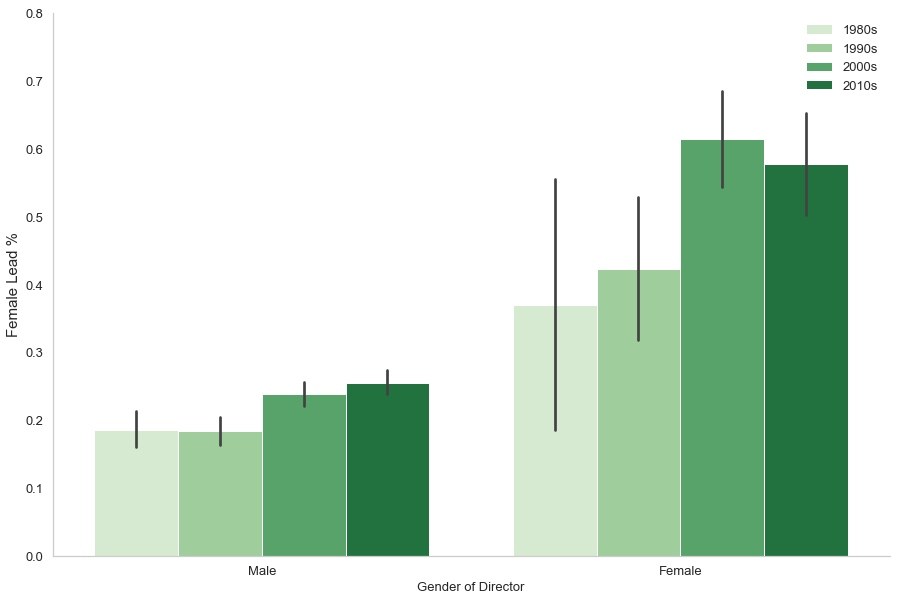

In [25]:
#Preparing the data
done = dfd
work=done.groupby(['Year'])
work_d=done[done.d_Drop == 0]
work_d.loc[(2010 <= work_d.Year) & (work_d.Year < 2020), 'Decade'] = '2010s'
work_d.loc[(2000 <= work_d.Year) & (work_d.Year < 2010), 'Decade'] = '2000s'
work_d.loc[(1990 <= work_d.Year) & (work_d.Year < 2000), 'Decade'] = '1990s'
work_d.loc[(1980 <= work_d.Year) & (work_d.Year < 1990), 'Decade'] = '1980s'


#Making the plot
fig, ax = plt.subplots(figsize = (15, 10))
ax.set_ylim([0,0.8])
gender=['Male','Female']

sns.barplot(x='d_Female', y='Female', hue='Decade',hue_order=["1980s","1990s",'2000s','2010s'] , data=work_d, palette=('Greens'))
plt.xlabel('Gender of Director', fontsize='13')
plt.ylabel('Female Lead %', fontsize='15')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(gender))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
ax.grid(False)

ax.legend(frameon=False)

sns.despine(left=False, bottom=False, right=True)
plt.savefig('Directors.png')

### Directors, plot 2

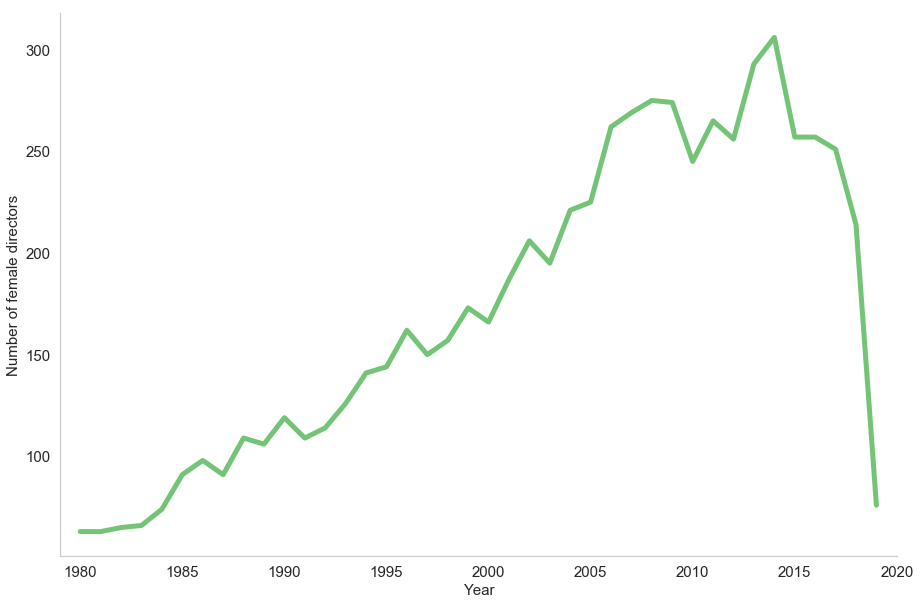

In [40]:
dfd1 = dfd.groupby(['Year'])

dfd2=dfd1['d_Female'].count().reset_index()
dfd3 = dfd2.set_index('Year')
plt.figure(figsize=(15,10))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
ax2 = sns.lineplot(data=dfd3, legend = False, palette = 'Greens', linewidth=5)
ax2.set_xlim([1979,2020])
ax2.grid(False)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of female directors', fontsize=15)
plt.rc('legend', fontsize=15) 
sns.despine(left=False, right=True, bottom=False)
plt.savefig("number of director")

# Plots: Data Collection process

In [ ]:
import scraping_class
logfile = 'log.csv'## name your log file.
connector = scraping_class.Connector(logfile)

In [ ]:
### Getting the data for the years all the way back to 1920

year_list= []

for v in range(1, 201):
    url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_nxt&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc&sort=num_votes,desc'.format(v)
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(50):
        headline_i = soup.findAll('h3')[i] # search for the first headline: h1 tag. 
        value = headline_i.text.strip() # extract text using build in method        
        film = value.split('\n')[2]
        if len(film)> 6:
            film = value.split(' ')[-1]
        year_list.append(film)


len(year_list)

year_list

In [ ]:
#Converting to a new list
year_listny = []

for i in range(10000):
    ny= year_list[i][1:5]
    year_listny.append(ny)


years = list(map(int, year_listny))

In [ ]:
# Plot for the years 1920 - 2019
fig1=sns.lineplot(data=taels, palette='Greens', legend = None, linewidth=5)
plt.xlabel('Years')
plt.ylabel('Number of movies')
axes = plt.axes()
axes.set_xlim([1920, 2019])
sns.despine(left=False, right=True, bottom=False)
plt.savefig('xfig1.png')

In [ ]:
# Plot for the years 1980 - 2019
fig2 = sns.lineplot(data=taels, palette='Greens', legend = None, linewidth=5)
plt.xlabel('Years')
plt.ylabel('Number of movies')
axes = plt.axes()
axes.set_xlim([1980, 2019])
sns.despine(left=False, right=True, bottom=False)
plt.savefig('xfig2.png')